In [2]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib import ticker
from scipy.stats import sem
from scipy.io import loadmat
from RZutilpy.figure import bar, plot, default_img_set, colorpalettable
from scipy.stats import ttest_rel
default_img_set()

In [3]:
with open('../Results/Signal_Noise_curve.pkl', 'rb') as f:
    Metrics = pickle.load(f)
Metrics['Signal_curve'] = np.abs(Metrics['Signal_curve'])

In [4]:
Signal_curve_mean = Metrics['Signal_curve'].mean(axis=(1,5))[:,:,0,-1]
Signal_curve_se = sem(Metrics['Signal_curve'].mean(axis=(5)), axis=1)[:,:,0,-1]
Noise_curve_mean = Metrics['Noise_curve'].mean(axis=(1,5))[:,:,0,-1]
Noise_curve_se = sem(Metrics['Noise_curve'].mean(axis=(5)), axis=1)[:,:,0,-1]

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


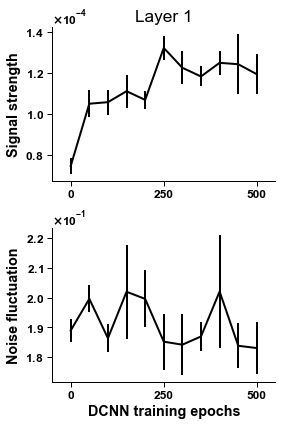

In [6]:
ryzcolor = colorpalettable('ryz1')

fig, ax = plt.subplots(2, 1, figsize=(4, 6))

plt.sca(ax[0])
plot(np.arange(0,550,50), Signal_curve_mean[0], 
        yerr=Signal_curve_se[0], fmt='-o', color='k', ms=0.1)
ax[0].set_xticks([0,250,500])
ax[0].set_xlim([-50,550])
ax[0].set_yscale('linear')
ax[0].ticklabel_format(axis='y', scilimits=[0, 0], useMathText=True)
ax[0].set_ylabel('Signal strength')
ax[0].set_title('Layer 1')

plt.sca(ax[1])
plot(np.arange(0,550,50), Noise_curve_mean[0], 
        yerr=Noise_curve_se[0], fmt='-o', color='k', ms=0.1)
ax[1].set_xticks([0,250,500])
ax[1].set_xlim([-50,550])
ax[1].set_yscale('linear')
ax[1].ticklabel_format(axis='y', scilimits=[0, 0], useMathText=True)
ax[1].set_xlabel('DCNN training epochs')
ax[1].set_ylabel('Noise fluctuation')
plt.savefig('FigS3_1.pdf')
